In [2]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv(r'./data/labels.csv', sep=';')
df = df.drop(columns=['Center', 'Patient ID'])
# df = df.drop(columns=['Center', 'Anonymized ID', 'Patient ID'])
df.head()

,Anonymized ID,parotid/submandibular,machine,OMERACT score,Sex,Age at US evaluation,disease duration
0,1,submandibular,samsung,3,F,72,18
1,2,parotid,samsung,3,F,72,18
2,3,parotid,samsung,3,F,59,1
3,4,parotid,samsung,0,F,65,8
4,5,submandibular,samsung,0,F,65,8


In [4]:
cat_cols = ['parotid/submandibular', 'machine', 'Sex']
for col in cat_cols:
    print(' '*15 + f'|{0:^7}|{1:^7}|{2:^7}|{3:^7}|')
    for v in df[col].unique():
        print(f'{v:>14} |', end='')
        for i in range(4):
            value = len(df[(df[col] == v) & (df['OMERACT score'] == i)]) / len(df[df[col] == v])
            print(f'{value:6.3} |', end='')
        print('')
    print('\n')

               |   0   |   1   |   2   |   3   |
 submandibular | 0.495 | 0.192 | 0.162 | 0.152 |
       parotid | 0.356 |0.0792 | 0.257 | 0.307 |


               |   0   |   1   |   2   |   3   |
       samsung | 0.435 | 0.101 | 0.116 | 0.348 |
       philips | 0.523 |0.0455 |  0.25 | 0.182 |
        esaote |  0.39 | 0.268 | 0.195 | 0.146 |
            GE | 0.348 | 0.152 | 0.326 | 0.174 |


               |   0   |   1   |   2   |   3   |
             F | 0.426 | 0.131 | 0.199 | 0.244 |
             M | 0.417 | 0.167 | 0.292 | 0.125 |




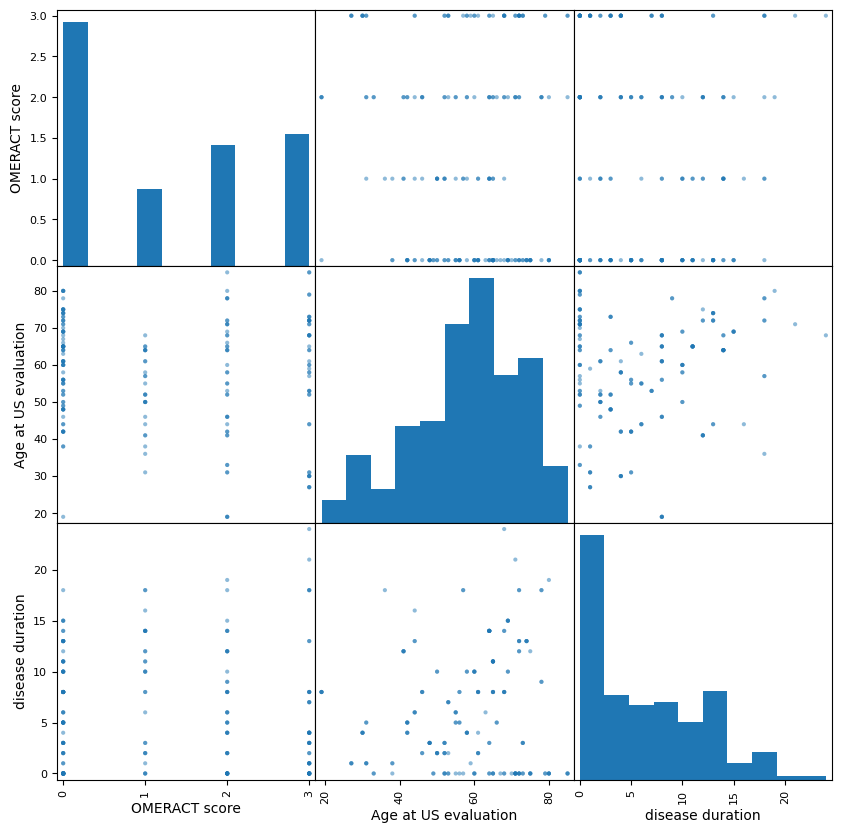

In [5]:
# Plot scatter matrix
pd.plotting.scatter_matrix(df, figsize=(10, 10), diagonal='hist')
plt.show()

In [6]:
sizes = []
for file in os.listdir('./data/imgs/'):
    img = Image.open(os.path.join('./data/imgs/', file))
    sizes.append(img.size)
sizes = np.array(sizes)
sizes = np.unique(sizes, axis=0)
sizes


array([[606, 459],
       [781, 365],
       [908, 584],
       [921, 641]])

In [23]:
for sample in df.iterrows():
    print(f'./data/imgs/{sample[1]['Anonymized ID']:03}.jpg',
          f'./data/OMERACT_{sample[1]['OMERACT score']:02}/{sample[1]['Anonymized ID']:03}.jpg')

./data/imgs/001.jpg ./data/OMERACT_03/001.jpg
./data/imgs/002.jpg ./data/OMERACT_03/002.jpg
./data/imgs/003.jpg ./data/OMERACT_03/003.jpg
./data/imgs/004.jpg ./data/OMERACT_00/004.jpg
./data/imgs/005.jpg ./data/OMERACT_00/005.jpg
./data/imgs/006.jpg ./data/OMERACT_00/006.jpg
./data/imgs/007.jpg ./data/OMERACT_00/007.jpg
./data/imgs/008.jpg ./data/OMERACT_00/008.jpg
./data/imgs/009.jpg ./data/OMERACT_03/009.jpg
./data/imgs/010.jpg ./data/OMERACT_00/010.jpg
./data/imgs/011.jpg ./data/OMERACT_00/011.jpg
./data/imgs/012.jpg ./data/OMERACT_00/012.jpg
./data/imgs/013.jpg ./data/OMERACT_02/013.jpg
./data/imgs/014.jpg ./data/OMERACT_00/014.jpg
./data/imgs/015.jpg ./data/OMERACT_01/015.jpg
./data/imgs/016.jpg ./data/OMERACT_00/016.jpg
./data/imgs/017.jpg ./data/OMERACT_00/017.jpg
./data/imgs/018.jpg ./data/OMERACT_00/018.jpg
./data/imgs/019.jpg ./data/OMERACT_03/019.jpg
./data/imgs/020.jpg ./data/OMERACT_03/020.jpg
./data/imgs/021.jpg ./data/OMERACT_00/021.jpg
./data/imgs/022.jpg ./data/OMERACT